<h1>Telco Customer Churn</h1>

<h2>Data Set Description</h2>
<ul>
<li>Telco Customer Churn located at https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv</li>
<li>This data set contains various demographic attributes of a given Telco customers and target variable indicating whether they churn from the service</li>

![](data_description.png)

<h3>Data Limitations:</h3> Unbalanced dataset. Columns with nan and null values are present.
    Most of the data can't be interpreted easily by initial reading of the csv file.

<h2>Problem</h2>
    To predict the possibility of customer churn for a Telco company by analyzing various features like the demographics of a customer and the services that the customer has subscribed for with the company. Since, the output variable is boolean one, we need to run classification models to predict the right model.
<h2> Importance</h2>
    Customer churn is a significant issue in any company and cost of retaining an existing customer is far less than acquiring a new customer.
So, being able to predict the potential churn of existing customers and identify the characteristics of churning customers will help the company to take steps to stop the customer from leaving by developing various customer retention programs.
    
![](data_importance.png)
</ul>

<h2>Data Preparation and Explanation</h2>

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load raw data file
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

#Lets do the preliminary data cleaning
data.isnull().any()


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges       True
TotalCharges         True
Churn               False
dtype: bool

MonthlyCharges and TotalCharges has some null columns.
Let's drop these rows as this doesn't look correct. MonthCharges and TotalCharges
are obviously related to Customer Churn as customer look for cheaper price products.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Data Cleaning
#There are some null value in two columns
#Lets drop those rows with null columns
data = data[data['MonthlyCharges'].notnull()]
data = data[data['TotalCharges'].notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7039 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7039 non-null   object 
 1   gender            7039 non-null   object 
 2   SeniorCitizen     7039 non-null   int64  
 3   Partner           7039 non-null   object 
 4   Dependents        7039 non-null   object 
 5   tenure            7039 non-null   int64  
 6   PhoneService      7039 non-null   object 
 7   MultipleLines     7039 non-null   object 
 8   InternetService   7039 non-null   object 
 9   OnlineSecurity    7039 non-null   object 
 10  OnlineBackup      7039 non-null   object 
 11  DeviceProtection  7039 non-null   object 
 12  TechSupport       7039 non-null   object 
 13  StreamingTV       7039 non-null   object 
 14  StreamingMovies   7039 non-null   object 
 15  Contract          7039 non-null   object 
 16  PaperlessBilling  7039 non-null   object 


In [4]:
#Still we need some data cleaning
data.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
data = data[data['TotalCharges'].notna()]
data.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
# More data cleaning
# Drop columns those are obviously not related to the output variable
data.drop(['customerID'], axis=1, inplace=True)


In [7]:
#I observed that there are columns with zero tenure
dtenure = data[data['tenure'] == 0]
dtenure

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [8]:
#Total charges was empty for zero tenure rows, Let's make total charges equal to monthly charges
data.loc[data['tenure'] == 0, 'TotalCharges'] = data['MonthlyCharges']
data[data['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.7,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,61.9,No


<h2> Analysis by Data Aggregation </h2>

In [9]:
rows, columns = data.shape
print("Total Rows: ", rows)
print()
print("Churn Yes data by category pf each columns")
c1 = data[data['Churn']=="Yes"].groupby(by='gender')['Churn'].count()
print(c1)
print()


c1 = data[data['Churn']=="Yes"].groupby(by='SeniorCitizen')['Churn'].count()
print(c1)
print()


c1 = data[data['Churn']=="Yes"].groupby(by='MultipleLines')['Churn'].count()
print(c1)
print()

c1 = data[data['Churn']=="Yes"].groupby(by='InternetService')['Churn'].count()
print(c1)
print()

c1 = data[data['Churn']=="Yes"].groupby(by='OnlineSecurity')['Churn'].count()
print(c1)
print()

c1 = data[data['Churn']=="Yes"].groupby(by='OnlineBackup')['Churn'].count()
print(c1)
print()

c1 = data[data['Churn']=="Yes"].groupby(by='DeviceProtection')['Churn'].count()
print(c1)
print()

c1 = data[data['Churn']=="Yes"].groupby(by='TechSupport')['Churn'].count()
print(c1)
print()

c1 = data[data['Churn']=="Yes"].groupby(by='StreamingTV')['Churn'].count()
print(c1)
print()

c1 = data[data['Churn']=="Yes"].groupby(by='StreamingMovies')['Churn'].count()
print(c1)
print()

c1 = data[data['Churn']=="Yes"].groupby(by='Contract')['Churn'].count()
print(c1)
print()


Total Rows:  7039

Churn Yes data by category pf each columns
gender
Female    939
Male      929
Name: Churn, dtype: int64

SeniorCitizen
0    1392
1     476
Name: Churn, dtype: int64

MultipleLines
No                  848
No phone service    170
Yes                 850
Name: Churn, dtype: int64

InternetService
DSL             459
Fiber optic    1296
No              113
Name: Churn, dtype: int64

OnlineSecurity
No                     1460
No internet service     113
Yes                     295
Name: Churn, dtype: int64

OnlineBackup
No                     1232
No internet service     113
Yes                     523
Name: Churn, dtype: int64

DeviceProtection
No                     1210
No internet service     113
Yes                     545
Name: Churn, dtype: int64

TechSupport
No                     1445
No internet service     113
Yes                     310
Name: Churn, dtype: int64

StreamingTV
No                     941
No internet service    113
Yes                    814
Name:

<h2>Observastion</h2>
<li>Highest churn with following category. </li>
<li> 1. Month to Month contract </li>
<li> 2. No online security </li>
<li>3. No TechSupport </li>
<li>4. No Device Protection </li>

<h2>Data Visualization</h2>

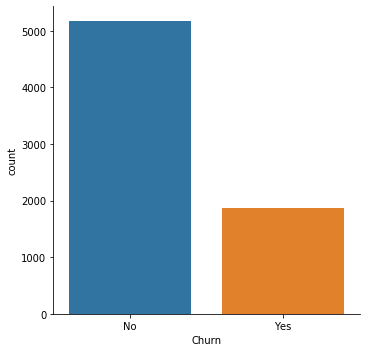

In [10]:
#Let's do some visualization before running regression models
import seaborn as sns
sns.catplot(x='Churn', data=data, kind='count')

Over all Churn percentage is less, looking at the plot above.

<h2> Relationship between Categorical Variables </h2>

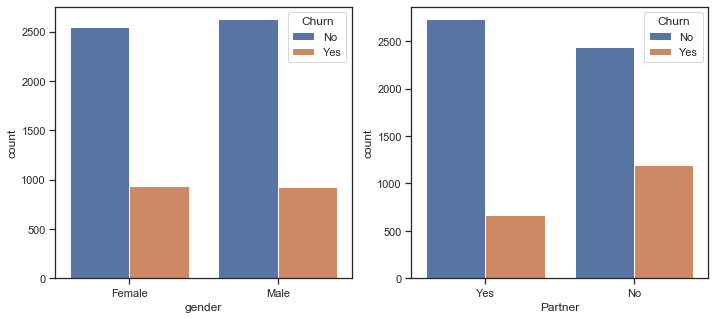

In [11]:

#data.head()
sns.set(style="ticks")
a4_dims = (11.7, 5)
fig, ax =plt.subplots(1,2,figsize=a4_dims)
sns.countplot(x="gender", hue="Churn", data=data, ax=ax[0])
sns.countplot(x="Partner", hue="Churn", data=data, ax=ax[1])
#sns.countplot(x="SeniorCitizen", hue="Churn", data=data, ax=ax[2])
plt.show()

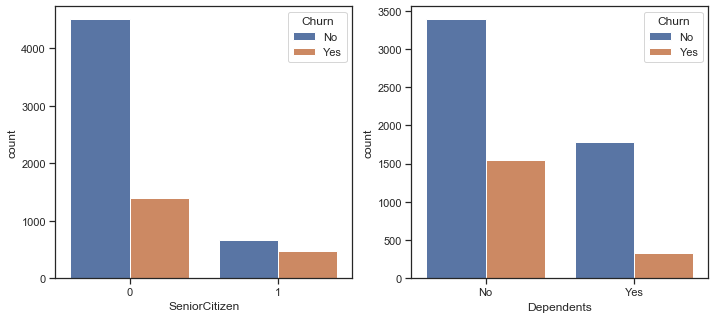

In [12]:
sns.set(style="ticks")
a4_dims = (11.7, 5)
fig, ax =plt.subplots(1,2,figsize=a4_dims)
sns.countplot(x="SeniorCitizen", hue="Churn", data=data, ax=ax[0])
sns.countplot(x="Dependents", hue="Churn", data=data, ax=ax[1])
plt.show()

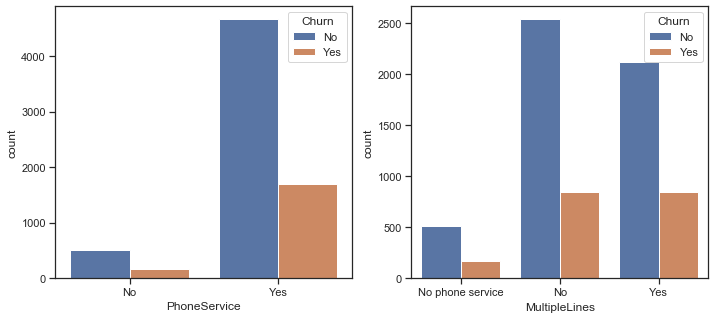

In [13]:
sns.set(style="ticks")
a4_dims = (11.7, 5)
fig, ax =plt.subplots(1,2,figsize=a4_dims)
sns.countplot(x="PhoneService", hue="Churn", data=data, ax=ax[0])
sns.countplot(x="MultipleLines", hue="Churn", data=data, ax=ax[1])
plt.show()

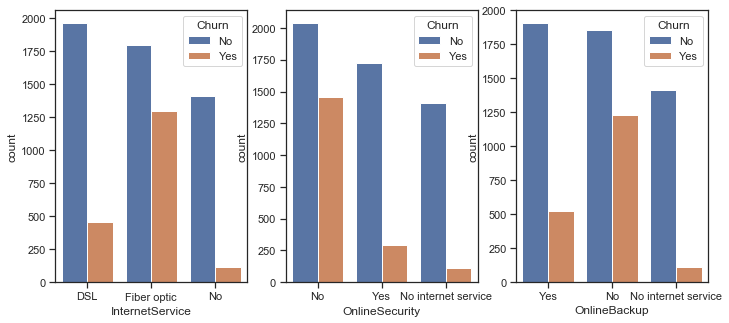

In [14]:
sns.set(style="ticks")
a4_dims = (11.7, 5)
fig, ax =plt.subplots(1,3,figsize=a4_dims)
sns.countplot(x="InternetService", hue="Churn", data=data, ax=ax[0])
sns.countplot(x="OnlineSecurity", hue="Churn", data=data, ax=ax[1])
sns.countplot(x="OnlineBackup", hue="Churn", data=data, ax=ax[2])
plt.show()

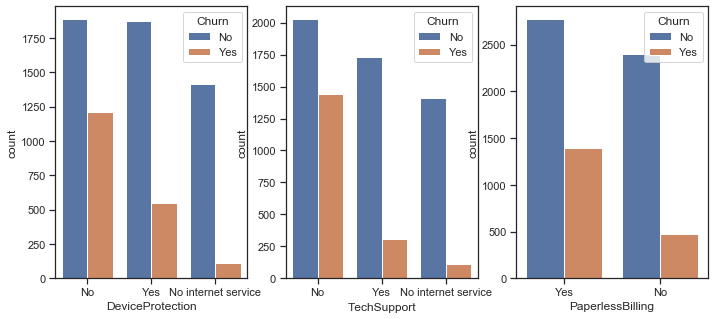

In [15]:
sns.set(style="ticks")
a4_dims = (11.7, 5)
fig, ax =plt.subplots(1,3,figsize=a4_dims)
sns.countplot(x="DeviceProtection", hue="Churn", data=data, ax=ax[0])
sns.countplot(x="TechSupport", hue="Churn", data=data, ax=ax[1])
sns.countplot(x="PaperlessBilling", hue="Churn", data=data, ax=ax[2])
plt.show()

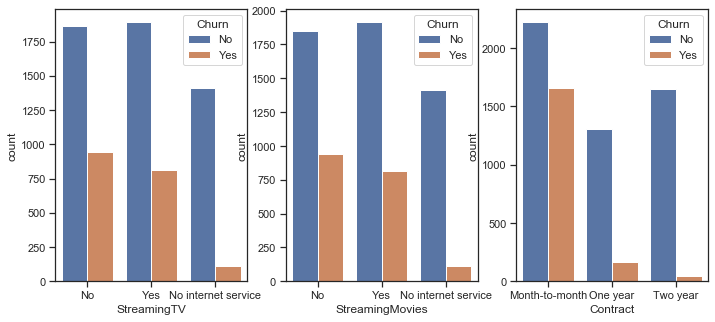

In [16]:
sns.set(style="ticks")
a4_dims = (11.7, 5)
fig, ax =plt.subplots(1,3,figsize=a4_dims)
sns.countplot(x="StreamingTV", hue="Churn", data=data, ax=ax[0])
sns.countplot(x="StreamingMovies", hue="Churn", data=data, ax=ax[1])
sns.countplot(x="Contract", hue="Churn", data=data, ax=ax[2])
plt.show()

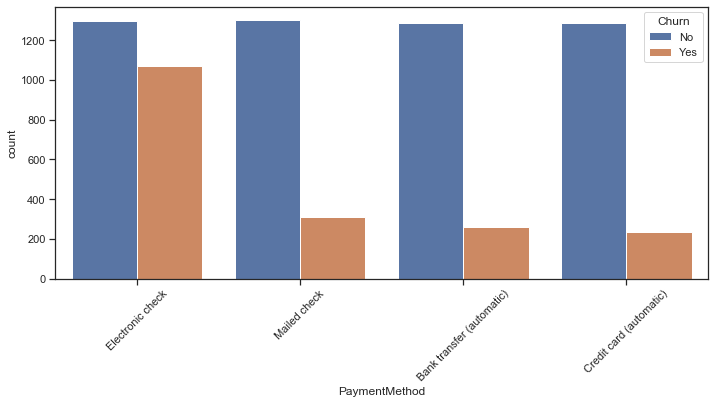

In [17]:
sns.set(style="ticks")
a4_dims = (11.7, 5)
fig, ax =plt.subplots(figsize=a4_dims)
pm_grp_names=data['PaymentMethod'].unique()
ax.set_xticklabels(pm_grp_names, rotation=45)
sns.countplot(x="PaymentMethod", hue="Churn", data=data, ax=ax)
plt.show()

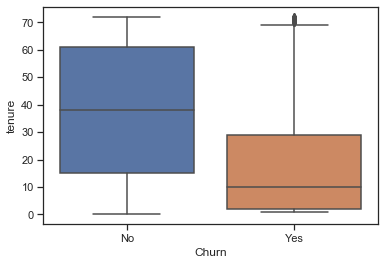

In [18]:
sns.boxplot(x="Churn", y="tenure", data=data)

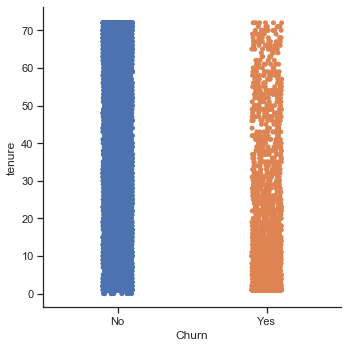

In [19]:
sns.catplot(x="Churn", y="tenure", data=data)

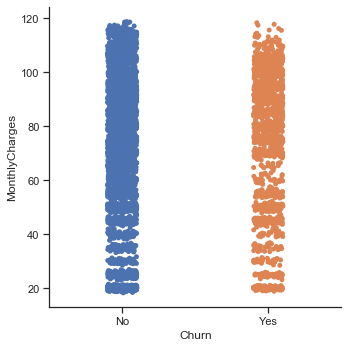

In [20]:
sns.catplot(x="Churn", y="MonthlyCharges", data=data)

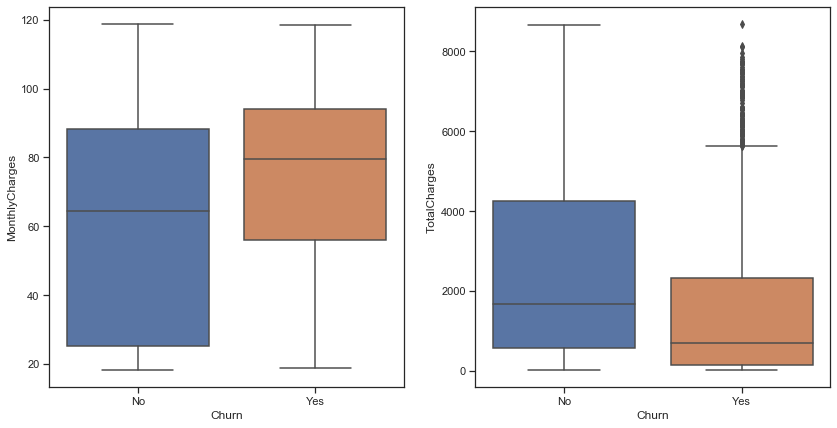

In [21]:
#Some total charges entries are non-numeric
#Fixing them below
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#data = data[data['TotalCharges'].notnull()]

sns.set(style="ticks")
a4_dims = (14, 7)
fig, ax =plt.subplots(1,2, figsize=a4_dims)
#sns.boxplot(x="Churn", y="tenure", data=data, ax=ax[0])
sns.boxplot(x="Churn", y="MonthlyCharges", data=data, ax=ax[0])
sns.boxplot(x="Churn", y="TotalCharges", data=data, ax=ax[1])
plt.show()

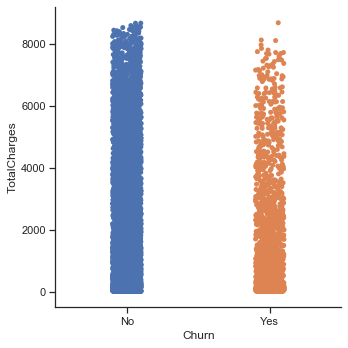

In [22]:
sns.catplot(x="Churn", y="TotalCharges", data=data)

<h2>Observartions from Data Visualisation</h2>
<li>1. Gender doesn't matter for churn. </li>
<li>2. No Partner folks tend to Chrun more </li>
<li>3. Non senior citizens and no dependents tend to Churn. </li>
<li>4. Customers with phone service tend to churn. </li>
<li>5. Multiple lines doesn't matter for churn. </li>
<li>6. Customers with Fibre optics intet service tend to churn. </li>
<li>7. Customers with no online security tend Churn. Online security is
       an important consideration for people to stick to the current service. </li>
<li>8. Customers with no online backup tend to chrun. </li>
<li>9. Customers with no device protection tend to churn. </li>
<li>10. Customers with month to month contract tend to churb. </li>
<li>11. StremingTV and StreamingMovies services seems doesn't matter for churn. Though, customers not having these services has higher churn rate. </li>
<li>12. Customers with payment method as electronics check tend to churn. Mostly, educated
        people and high income category professionals use electronic check, and hence we can  infer that they tend to churn more. </li>
<li> 13. Customers with more monthly charges tend to churn more. </li>
<li> 14. Customers with low total charges tend to churn. This is little confusing. But
         total charges are accumulated over time and hence monthly charges are important 
         consideration to decide people churn. </li>
<li> 15. Customers with more tenure churn less. This means, the customers who are with the
         company for long time, tend to exhibit loyalty and continue service with the company.
    </li>16. Customers with paperless billing tend to chrun. Mostly, educated
        people and high income category professionals use electronic check, and hence we can  infer that they tend to churn more. <li>

<h2> Relationship between Important Numeric Variables </h2>

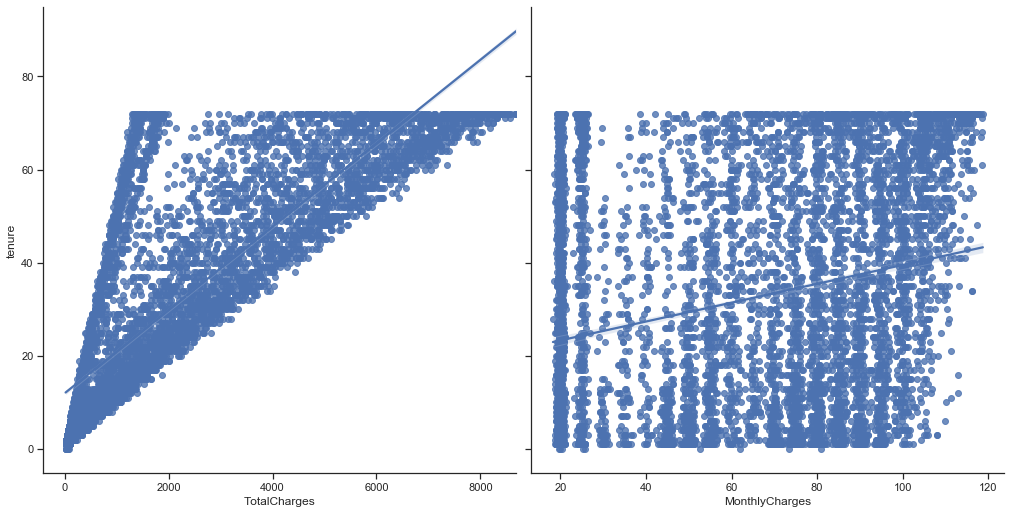

In [23]:
sns.pairplot(data, x_vars=["TotalCharges", "MonthlyCharges"], y_vars='tenure', height=7, aspect=1, kind="reg")


In [24]:
#Correlation between important numeric data 
df2=data[['tenure', 'MonthlyCharges', 'TotalCharges']]
df2.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247941,0.826070
MonthlyCharges,0.247941,1.000000,0.651406
TotalCharges,0.826070,0.651406,1.000000


High correlation between tenure and Total Charges. It means, customer paid high over all charges over a period of time.

<h2> Data Preparation for Modelling </h2>

Based on the observations from data visualisation above,
I have decided to drop following coliumns as they doesn't mean much to the output variable.
<li>1. gender </li>
<li>2. MultipleLines </li>
I dropped CustomerID already as that is irrelavant for analysis.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7039 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7039 non-null   object 
 1   SeniorCitizen     7039 non-null   int64  
 2   Partner           7039 non-null   object 
 3   Dependents        7039 non-null   object 
 4   tenure            7039 non-null   int64  
 5   PhoneService      7039 non-null   object 
 6   MultipleLines     7039 non-null   object 
 7   InternetService   7039 non-null   object 
 8   OnlineSecurity    7039 non-null   object 
 9   OnlineBackup      7039 non-null   object 
 10  DeviceProtection  7039 non-null   object 
 11  TechSupport       7039 non-null   object 
 12  StreamingTV       7039 non-null   object 
 13  StreamingMovies   7039 non-null   object 
 14  Contract          7039 non-null   object 
 15  PaperlessBilling  7039 non-null   object 
 16  PaymentMethod     7039 non-null   object 


In [26]:
# Drop columns is obviously not related to the output variable as per our observations
data.drop({'gender'}, axis=1, inplace=True)
data.drop({'MultipleLines'}, axis=1, inplace=True)

# Create dummy columns for categorical variables
dft = pd.get_dummies(data, columns=['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])

# Create binary columns for boolean values 
#data.gender.replace(['Female', 'Male'], [1, 0], inplace=True)
dft.Partner.replace(['Yes', 'No'], [1, 0], inplace=True)
dft.Dependents.replace(['Yes', 'No'], [1, 0], inplace=True)
dft.PhoneService.replace(['Yes', 'No'], [1, 0], inplace=True)
dft.PaperlessBilling.replace(['Yes', 'No'], [1, 0], inplace=True)


#Create binary column for target variable
dft.Churn.replace(['Yes', 'No'], [1, 0], inplace=True)

pd.set_option('max_columns', 100)


In [27]:
dft.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000
mean,0.162097,0.482881,0.299474,32.388550,0.903253,0.592272,64.764242,2281.012907,0.265379,0.343799,0.439551,0.216650,0.496661,0.216650,0.286688,0.438415,0.216650,0.344935,0.439551,0.216650,0.343799,0.493110,0.216650,0.290240,0.399062,0.216650,0.384288,0.395369,0.216650,0.387981,0.550220,0.209263,0.240517,0.219349,0.215940,0.335843,0.228868
std,0.368566,0.499742,0.458060,24.555556,0.295634,0.491447,30.091368,2266.800194,0.441566,0.475009,0.496368,0.411991,0.500024,0.411991,0.452247,0.496228,0.411991,0.475381,0.496368,0.411991,0.475009,0.499988,0.411991,0.453905,0.489740,0.411991,0.486461,0.488964,0.411991,0.487325,0.497507,0.406811,0.427428,0.413835,0.411502,0.472318,0.420134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,399.525000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1396.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3790.400000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7039 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7039 non-null   int64  
 1   Partner                                  7039 non-null   int64  
 2   Dependents                               7039 non-null   int64  
 3   tenure                                   7039 non-null   int64  
 4   PhoneService                             7039 non-null   int64  
 5   PaperlessBilling                         7039 non-null   int64  
 6   MonthlyCharges                           7039 non-null   float64
 7   TotalCharges                             7039 non-null   float64
 8   Churn                                    7039 non-null   int64  
 9   InternetService_DSL                      7039 non-null   uint8  
 10  InternetService_Fiber optic              7039 no

In [29]:
dft.columns.tolist()

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

<h2>Correlations</h2>
After data cleaning and data preparation, do correlation on the whole data to see which are
the most and least correlated predictors.

In [30]:
dft.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016225,-0.210993,0.016746,0.008330,0.156274,0.219885,0.103186,0.151215,-0.108164,0.255112,-0.182651,0.185274,-0.182651,-0.038455,0.087608,-0.182651,0.066846,0.095120,-0.182651,0.059023,0.205375,-0.182651,-0.060441,0.049332,-0.182651,0.105026,0.034599,-0.182651,0.119700,0.138083,-0.046215,-0.116737,-0.016095,-0.024721,0.172059,-0.153364
Partner,0.016225,1.000000,0.452544,0.380394,0.018121,-0.014539,0.097034,0.318014,-0.150040,-0.000941,0.000553,0.000418,-0.129729,0.000418,0.143053,-0.135889,0.000418,0.141486,-0.147228,0.000418,0.153486,-0.109226,0.000418,0.119936,-0.123897,0.000418,0.124377,-0.117374,0.000418,0.117416,-0.280713,0.082970,0.247769,0.110909,0.081544,-0.083391,-0.095366
Dependents,-0.210993,0.452544,1.000000,0.160201,-0.001110,-0.110777,-0.113465,0.062427,-0.163971,0.051766,-0.165337,0.139514,-0.187943,0.139514,0.080702,-0.138257,0.139514,0.023410,-0.129092,0.139514,0.013891,-0.172144,0.139514,0.062990,-0.100848,0.139514,-0.016629,-0.078306,0.139514,-0.039378,-0.231230,0.068528,0.203918,0.052177,0.060152,-0.150366,0.058730
tenure,0.016746,0.380394,0.160201,1.000000,0.008056,0.005983,0.247941,0.826070,-0.352549,0.013165,0.019780,-0.039010,-0.263974,-0.039010,0.327399,-0.312877,-0.039010,0.360406,-0.313268,-0.039010,0.361189,-0.262365,-0.039010,0.324409,-0.245463,-0.039010,0.280155,-0.252277,-0.039010,0.286105,-0.646148,0.202311,0.559534,0.243262,0.233749,-0.208675,-0.233967
PhoneService,0.008330,0.018121,-0.001110,0.008056,1.000000,0.015977,0.247516,0.113013,0.011671,-0.452147,0.289834,0.172113,-0.058414,0.172113,-0.092208,-0.093405,0.172113,-0.051662,-0.075201,0.172113,-0.070698,-0.054976,0.172113,-0.095663,-0.122905,0.172113,-0.022032,-0.111811,0.172113,-0.033320,-0.001256,-0.002944,0.004264,0.007406,-0.006944,0.002757,-0.003593
PaperlessBilling,0.156274,-0.014539,-0.110777,0.005983,0.015977,1.000000,0.351897,0.158522,0.191605,-0.062873,0.326479,-0.320853,0.267373,-0.320853,-0.003327,0.144638,-0.320853,0.127088,0.166883,-0.320853,0.103899,0.229695,-0.320853,0.038210,0.047410,-0.320853,0.224005,0.059547,-0.320853,0.211506,0.168605,-0.051466,-0.147266,-0.016395,-0.013527,0.208655,-0.205173
MonthlyCharges,0.219885,0.097034,-0.113465,0.247941,0.247516,0.351897,1.000000,0.651406,0.193352,-0.160242,0.787070,-0.763511,0.360666,-0.763511,0.296781,0.210451,-0.763511,0.442020,0.171800,-0.763511,0.482695,0.321824,-0.763511,0.338510,0.016843,-0.763511,0.629673,0.018053,-0.763511,0.627369,0.059765,0.004862,-0.074191,0.042781,0.030277,0.271648,-0.377184
TotalCharges,0.103186,0.318014,0.062427,0.826070,0.113013,0.158522,0.651406,1.000000,-0.198495,-0.052568,0.361876,-0.375380,-0.063215,-0.375380,0.411860,-0.176356,-0.375380,0.509415,-0.188453,-0.375380,0.522507,-0.082958,-0.375380,0.432097,-0.196189,-0.375380,0.515426,-0.202196,-0.375380,0.520228,-0.444621,0.170588,0.355160,0.185772,0.183438,-0.059418,-0.295859
Churn,0.151215,-0.150040,-0.163971,-0.352549,0.011671,0.191605,0.193352,-0.198495,1.000000,-0.124113,0.307872,-0.227828,0.342506,-0.227828,-0.171142,0.267835,-0.227828,-0.082132,0.252122,-0.227828,-0.065856,0.337147,-0.227828,-0.164586,0.128484,-0.227828,0.063600,0.130597,-0.227828,0.061573,0.405006,-0.177892,-0.302097,-0.11798

In [31]:
#Highest correlated items
corr = dft.corr()
corr[corr<1].stack().nlargest(10)[::2]

tenure          TotalCharges                   0.826070
MonthlyCharges  InternetService_Fiber optic    0.787070
                TotalCharges                   0.651406
                StreamingTV_Yes                0.629673
                StreamingMovies_Yes            0.627369
dtype: float64

In [32]:
#Leat correlated items
corr[corr<1].stack().abs().nsmallest(10)[::2]

Contract_One year  PaymentMethod_Mailed check          0.000102
OnlineBackup_Yes   PaymentMethod_Electronic check      0.000270
Partner            InternetService_No                  0.000418
                   OnlineBackup_No internet service    0.000418
                   TechSupport_No internet service     0.000418
dtype: float64

In [33]:
cchurn = corr['Churn']
cchurn[cchurn<1].nlargest(10)

Contract_Month-to-month           0.405006
OnlineSecurity_No                 0.342506
TechSupport_No                    0.337147
InternetService_Fiber optic       0.307872
PaymentMethod_Electronic check    0.301562
OnlineBackup_No                   0.267835
DeviceProtection_No               0.252122
MonthlyCharges                    0.193352
PaperlessBilling                  0.191605
SeniorCitizen                     0.151215
Name: Churn, dtype: float64

<h2>Observation</h2>
Monthly charges are high correlated to Fiber optic internet service, streaming TV and streming Movies services.

Churn is highly correlated with following attrbiutes.

Contract_Month-to-month          
OnlineSecurity_No                 
TechSupport_No                   
InternetService_Fiber optic       
PaymentMethod_Electronic check   
OnlineBackup_No                   
DeviceProtection_No               
MonthlyCharges                   
PaperlessBilling                  
SeniorCitizen                     

<h2>Linear Regression on Tenure</h2>

In [34]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

dft = dft[dft['TotalCharges'].notna()]
dft.isna().any()

X = dft.loc[:, 
    ['SeniorCitizen',
     'Partner',
     'Dependents',
     'PhoneService',
     'PaperlessBilling',
     'MonthlyCharges',
     'TotalCharges',
     'InternetService_DSL',
     'InternetService_Fiber optic',
     'InternetService_No',
     'OnlineSecurity_No',
     'OnlineSecurity_No internet service',
     'OnlineSecurity_Yes',
     'OnlineBackup_No',
     'OnlineBackup_No internet service',
     'OnlineBackup_Yes',
     'DeviceProtection_No',
     'DeviceProtection_No internet service',
     'DeviceProtection_Yes',
     'TechSupport_No',
     'TechSupport_No internet service',
     'TechSupport_Yes',
     'StreamingTV_No',
     'StreamingTV_No internet service',
     'StreamingTV_Yes',
     'StreamingMovies_No',
     'StreamingMovies_No internet service',
     'StreamingMovies_Yes',
     'Contract_Month-to-month',
     'Contract_One year',
     'Contract_Two year',
     'PaymentMethod_Bank transfer (automatic)',
     'PaymentMethod_Credit card (automatic)',
     'PaymentMethod_Electronic check',
     'PaymentMethod_Mailed check']]

y = dft.loc[:, "tenure"]


model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
model.coef_

array([ 1.21446826,  2.63836463, -0.39759291, -7.39675068,  0.44365598,
       -0.01013198,  0.01028068,  3.01886082, -4.74441255,  1.72555173,
        0.14105603,  1.72555173, -1.86660776,  0.10668855,  1.72555173,
       -1.83224028,  0.37728425,  1.72555173, -2.10283598,  0.70721447,
        1.72555173, -2.4327662 ,  1.02388915,  1.72555173, -2.74944088,
        0.88815316,  1.72555173, -2.61370489, -6.56308141,  0.18853769,
        6.37454372,  1.92678875,  1.34496254,  0.75738249, -4.02913378])

In [36]:
model.intercept_

18.15859474662991

In [37]:
y_pred = model.predict(X_test)

print("Tenure Max:", dft["tenure"].max())
print("Tenure Min:", data["tenure"].min())

print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("root of mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R2 score: ", metrics.r2_score(y_test, y_pred))
print("Max error:", metrics.max_error(y_test, y_pred))
    

Tenure Max: 72
Tenure Min: 0
Mean Squared Error: 83.12631410393199
root of mean squared error:  9.117363330696655
R2 score:  0.8614162926205404
Max error: 31.452032119589262


In [57]:
#Let's remove some of the variables which can be irrelevant as per
#Observations from Visualisations
X = dft.loc[:, 
    ['SeniorCitizen',
    'Partner',
     'Dependents',
     'PhoneService',
     'PaperlessBilling',
    'MonthlyCharges',
    'TotalCharges',
     'InternetService_DSL',
     'InternetService_Fiber optic',
     'InternetService_No',
#     'OnlineSecurity_No',
     'OnlineSecurity_No internet service',
     'OnlineSecurity_Yes',
#     'OnlineBackup_No',
     'OnlineBackup_No internet service',
     'OnlineBackup_Yes',
     'DeviceProtection_No',
     'DeviceProtection_No internet service',
     'DeviceProtection_Yes',
#     'TechSupport_No',
     'TechSupport_No internet service',
     'TechSupport_Yes',
#     'StreamingTV_No',
#    'StreamingTV_No internet service',
      'StreamingTV_Yes',
#    'StreamingMovies_No',
#     'StreamingMovies_No internet service',
     'StreamingMovies_Yes',
#     'Contract_Month-to-month',
    'Contract_One year',
     'Contract_Two year',
     'PaymentMethod_Bank transfer (automatic)',
     'PaymentMethod_Credit card (automatic)',
#     'PaymentMethod_Electronic check',
     'PaymentMethod_Mailed check'
     ]]
y = dft.loc[:, "tenure"]      


model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)
model.coef_
model.intercept_

y_pred = model.predict(X_test)

print("Tenure Max:", dft["tenure"].max())
print("Tenure Min:", data["tenure"].min())

print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("root of mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R2 score: ", metrics.r2_score(y_test, y_pred))
print("Max error:", metrics.max_error(y_test, y_pred))
    


Tenure Max: 72
Tenure Min: 0
Mean Squared Error: 74.68811707046285
root of mean squared error:  8.64222870968264
R2 score:  0.8740135566486528
Max error: 34.75557763800527


<h2>Observation</h2>
Removing some of the variables contriburing for customer chrun resulted in minor improvement of RMSE. Since tenure is inversily (negatively) correlated with Churn, all the variable correlating postive for churn or negatively correlated for tenure. Removing those columns improved the MSE and RMSE. Also, there is improvement in the R2 score as well.

<h2>Classification Models</h2>
Since the output variable is boolean (Yes or No), we will run Classification Models
for this pronlem.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#Subroutine to run different classification models
def run_classification(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_test_predict = model.predict(X_test)
    #print(y_test_predict)
    acc_score = accuracy_score(y_test, y_test_predict) 
    print("Accuracy Score: ", acc_score)
    print(classification_report(y_test, y_test_predict))


In [40]:
#Store churn towards end for easy regression programmiong
dfc = dft.pop('Churn')
df = dft
df['Churn'] = dfc
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,1,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
3,0,0,0,45,0,0,42.30,1840.75,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
7039,0,1,1,72,1,1,103.20,7362.90,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
7040,0,1,1,11,0,1,29.60,346.45,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
7041,1,1,0,4,1,1,74.40,306.60,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1


In [41]:
df.columns.tolist()

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn']

In [42]:
#Still we need some data cleaning
df.isna().any()

SeniorCitizen                              False
Partner                                    False
Dependents                                 False
tenure                                     False
PhoneService                               False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                               False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
OnlineSecurity_No                          False
OnlineSecurity_No internet service         False
OnlineSecurity_Yes                         False
OnlineBackup_No                            False
OnlineBackup_No internet service           False
OnlineBackup_Yes                           False
DeviceProtection_No                        False
DeviceProtection_No internet service       False
DeviceProtection_Yes                       False
TechSupport_No      

In [43]:
df = df[df['TotalCharges'].notna()]
df.isna().any()

SeniorCitizen                              False
Partner                                    False
Dependents                                 False
tenure                                     False
PhoneService                               False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                               False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
OnlineSecurity_No                          False
OnlineSecurity_No internet service         False
OnlineSecurity_Yes                         False
OnlineBackup_No                            False
OnlineBackup_No internet service           False
OnlineBackup_Yes                           False
DeviceProtection_No                        False
DeviceProtection_No internet service       False
DeviceProtection_Yes                       False
TechSupport_No      

In [44]:
no_cols = len(df.columns)
#print(data.columns)
#print("Number of Columns: ", no_cols)

X = df.iloc[:, 0: no_cols-1]
y = df.iloc[:, -1]
#Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Decision Tree 
print("Decision Tree")
model = DecisionTreeClassifier()
#help(model)
run_classification(model, X_train, X_test, y_train, y_test)


#K-Nearest Neighbors
print("K-Nearest Neighbors")
model = KNeighborsClassifier(n_neighbors=10)
run_classification(model, X_train, X_test, y_train, y_test)

#Logistic Regressions
from sklearn.linear_model import LogisticRegression
print("Logistic Regression  solver: liblinear")
model = LogisticRegression(solver='liblinear')
run_classification(model, X_train, X_test, y_train, y_test)



#Support Vector Machine
print("SVC")
from sklearn.svm import SVC
model = SVC(C=1000.0, class_weight='balanced', gamma=0.005)
run_classification(model, X_train, X_test, y_train, y_test)


Decision Tree
Accuracy Score:  0.7310606060606061
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1557
           1       0.49      0.53      0.51       555

    accuracy                           0.73      2112
   macro avg       0.66      0.67      0.66      2112
weighted avg       0.74      0.73      0.73      2112

K-Nearest Neighbors
Accuracy Score:  0.7878787878787878
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1557
           1       0.66      0.39      0.49       555

    accuracy                           0.79      2112
   macro avg       0.74      0.66      0.68      2112
weighted avg       0.77      0.79      0.77      2112

Logistic Regression  solver: liblinear
Accuracy Score:  0.8001893939393939
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1557
           1       0.64      0.55      0.59       555

 

In [69]:
#Let's remove some of the variables which can be irrelevant as per
#Observations from Visualisations and correlation matrix
X = df.loc[:, 
    [
     'SeniorCitizen',
     'Partner',
     'Dependents',
     'tenure',
     'PhoneService',
     'PaperlessBilling',
#     'MonthlyCharges',
#    'TotalCharges',
#     'InternetService_DSL',
     'InternetService_Fiber optic',
#     'InternetService_No',
     'OnlineSecurity_No',
#     'OnlineSecurity_No internet service',
#     'OnlineSecurity_Yes',
     'OnlineBackup_No',
#    'OnlineBackup_No internet service',
#    'OnlineBackup_Yes',
     'DeviceProtection_No',
#     'DeviceProtection_No internet service',
#     'DeviceProtection_Yes',
     'TechSupport_No',
#     'TechSupport_No internet service',
#     'TechSupport_Yes',
     'StreamingTV_No',
#     'StreamingTV_No internet service',
#     'StreamingTV_Yes',
     'StreamingMovies_No',
#    'StreamingMovies_No internet service',
#     'StreamingMovies_Yes',
     'Contract_Month-to-month',
#     'Contract_One year',
#     'Contract_Two year',
#     'PaymentMethod_Bank transfer (automatic)',
#     'PaymentMethod_Credit card (automatic)',
     'PaymentMethod_Electronic check',
#     'PaymentMethod_Mailed check'
     ]]
y = df.loc[:, "Churn"]      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Decision Tree 
print("Decision Tree")
model = DecisionTreeClassifier()
#help(model)
run_classification(model, X_train, X_test, y_train, y_test)


#K-Nearest Neighbors
print("K-Nearest Neighbors")
model = KNeighborsClassifier(n_neighbors=10)
run_classification(model, X_train, X_test, y_train, y_test)

#Logistic Regressions
from sklearn.linear_model import LogisticRegression
print("Logistic Regression  solver: liblinear")
model = LogisticRegression(solver='liblinear')
run_classification(model, X_train, X_test, y_train, y_test)

#Support Vector Machine
print("SVC")
from sklearn.svm import SVC
model = SVC(C=1000.0, class_weight='balanced', gamma=0.005)
run_classification(model, X_train, X_test, y_train, y_test)


Decision Tree
Accuracy Score:  0.7386363636363636
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1543
           1       0.52      0.49      0.50       569

    accuracy                           0.74      2112
   macro avg       0.67      0.66      0.66      2112
weighted avg       0.73      0.74      0.74      2112

K-Nearest Neighbors
Accuracy Score:  0.787405303030303
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1543
           1       0.66      0.43      0.52       569

    accuracy                           0.79      2112
   macro avg       0.74      0.67      0.69      2112
weighted avg       0.77      0.79      0.77      2112

Logistic Regression  solver: liblinear
Accuracy Score:  0.8068181818181818
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1543
           1       0.68      0.54      0.60       569

  

<h2> Obsevations and Recommended Model </h2>

* **The accuracy of this logistic model is 81% which mean that this is a good model for predicting Customer Churn. The logistic regression model also has good F1 score and precison along with SVC model.**

* **As per output from correlations section above, I removed all the other variables that are not importnat for Churn. There is a minor improvement for logistic regressions. Accuracy did get improved for other models.**

* **But using the observations from highly correlated vairable with churn, the precison and F1 score improved a lot for all models. It shows that those varables are important for considering customer churn. We can infer hat all columns in the final data frame are contriburing towards the accuracy of the model.**  

 


<h2>Characteristics of churning customers</h2>
After predicting the potential churn of customers, I tried to identify what type of customers are churning out more. I identified that customers who have no partners, no dependents, senior citizens, no tech support and no additional services like online backup, online security, device protection and also on month-to-month contract basis are highly likely to churn.

<h2>Recommendations to Telco Management</h2>
As we realize that customers with no tech support, no additional services and are on monthly-contract are churning more, the company could 
•	Provide promotional offers or discounts on these additional services encouraging the customers to subscribe for them.
•	Offer free, efficient and timely technical support.
•	Incentivize customers and persuade them to switch from monthly contract to long-term contract.


<h2>Summary</h2>

![](Data_Analysis.png)
